# Decision Trees

Supervised machine learning algorithm used for both classification and regression tasks.

## Key Concepts

- Root Node: The topmost node representing the first decision.
- Internal Nodes: Decision points based on feature values.
- Leaves: Final predictions or outcomes.
- Splitting: Dividing a node into sub-nodes.
- Pruning: Removing unnecessary branches to avoid overfitting.

Types of Decision Trees:
1. Classification Trees:    Used when the target variable is categorical.
2. Regression Trees:        Used when the target variable is continuous.

How to Build a Decision Tree:
- The process of recursively splitting the data based on feature values.
- The decision of where to split depends on a splitting criterion, e.g.,
    - **Gini Index**, **Entropy** for Classification.
    - **MSE** for Regression.

# ID3 (Iterative Dichotomiser 3)

- a foundational decision tree algorithm
- created by Ross Quinlan.
- It’s used for classification tasks and
- builds the tree by choosing the feature that gives the **maximum Information Gain** at each step.

    maximum Information Gain ??

Information Gain (IG) - Tells us how much **uncertainty** is reduced by splitting on a feature.

    uncertainty ??

## Entropy & Information Gain

Entropy (𝓗) - Measures the impurity or uncertainty in the data:

    Entropy(S) = − ∑ pi.log2(pi)

        - S is the current dataset.
        - pi is the probability of class i in S.

Information Gain (IG) - Tells us how much uncertainty is reduced by splitting on a feature.

    IG(S,A) = Entropy(S) − v∈values(A) ∑ ∣Sv∣/∣S∣ Entropy(Sv)

        - A is a feature.
        - Sv is the subset of data where feature A has value v.

***The feature with the `highest IG` is chosen for the split.***

## ID3 Algorithm

1. Start with the full dataset.
2. Calculate Entropy for the dataset.
3. For each feature:
  - Compute Information Gain.
  - Choose the feature with the highest IG to split.
4. Recurse on each branch until:
  - All data in the subset belong to one class.
  - No more features left.

## Python Code: ID3 from Scratch

In [ ]:
import pandas as pd
import numpy as np
import math

# Sample dataset
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
})

features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
target = 'PlayTennis'

In [ ]:
for f in features:
    print(f"unique values for feature {f} are: {np.unique(data[f])}")

unique values for feature Outlook are: ['Overcast' 'Rain' 'Sunny']
unique values for feature Temperature are: ['Cool' 'Hot' 'Mild']
unique values for feature Humidity are: ['High' 'Normal']
unique values for feature Wind are: ['Strong' 'Weak']


In [ ]:
labels, counts = np.unique(data[target], return_counts=True)
labels, counts

(array(['No', 'Yes'], dtype=object), array([3, 4]))

In [ ]:
total_entropy = - (3/7 * math.log2(3/7) + 4/7 * math.log2(4/7))
total_entropy

0.9852281360342515

In [ ]:
# Entropy calculation
def entropy(data, target):
    values, counts = np.unique(data[target], return_counts=True)
    entropy = 0
    for i in range(len(values)):
        prob = counts[i] / np.sum(counts)
        entropy -= prob * math.log2(prob)
    return entropy

total_entropy = entropy(data, target)

np.float64(0.9852281360342515)

In [ ]:
print(data,'\n')

outlook_entropy = 0
for f in np.unique(data['Outlook']):
    feature_data = data[data['Outlook'] == f]
    print(feature_data,"\n")
    outlook_entropy += len(feature_data) / len(data) * entropy(feature_data, target)

info_gain = total_entropy - outlook_entropy
info_gain

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
5      Rain        Cool   Normal  Strong         No
6  Overcast        Mild   Normal  Strong        Yes 

    Outlook Temperature Humidity    Wind PlayTennis
2  Overcast         Hot     High    Weak        Yes
6  Overcast        Mild   Normal  Strong        Yes 

  Outlook Temperature Humidity    Wind PlayTennis
3    Rain        Mild     High    Weak        Yes
4    Rain        Cool   Normal    Weak        Yes
5    Rain        Cool   Normal  Strong         No 

  Outlook Temperature Humidity    Wind PlayTennis
0   Sunny         Hot     High    Weak         No
1   Sunny         Hot     High  Strong         No 



np.float64(0.5916727785823275)

In [ ]:
# Information Gain
def info_gain(data, feature, target):
    total_entropy = entropy(data, target)
    values, counts = np.unique(data[feature], return_counts=True)

    feature_entropy = 0
    for i in range(len(values)):
        subset = data[data[feature] == values[i]]
        weight = counts[i] / np.sum(counts)
        feature_entropy += weight * entropy(subset, target)

    return total_entropy - feature_entropy

info_gain(data, 'Outlook', target)

np.float64(0.5916727785823275)

In [ ]:
iteration = 0

# Entropy calculation
def entropy(data, target):
    values, counts = np.unique(data[target], return_counts=True)
    entropy = 0
    for i in range(len(values)):
        prob = counts[i] / np.sum(counts)
        entropy -= prob * math.log2(prob)
    return entropy

# Information Gain
def info_gain(data, feature, target):
    total_entropy = entropy(data, target)
    values, counts = np.unique(data[feature], return_counts=True)

    feature_entropy = 0
    for i in range(len(values)):
        subset = data[data[feature] == values[i]]
        weight = counts[i] / np.sum(counts)
        feature_entropy += weight * entropy(subset, target)

    return total_entropy - feature_entropy

# ID3 Algorithm (recursive)
def id3(data, features, target):
    unique_labels = np.unique(data[target])
    global iteration
    iteration+=1
    print("--"*25)
    print(f"ID3 iteration {iteration}")
    print(f"\nData:\n{data}")
    print(f"\nFeatures: {features}")
    print(f"Target: {target} with unique_labels: {unique_labels}")

    # Case 1: All same class
    if len(unique_labels) == 1:
        return unique_labels[0]

    # Case 2: No more features to split
    if len(features) == 0:
        print("\n No more features to split")
        return data[target].mode()[0]

    # Select best feature
    gains = [info_gain(data, f, target) for f in features]
    best_feature = features[np.argmax(gains)]

    print(f"\nInforamtion Gain for {features}:\n{gains}")
    print(f"\nBest feature: {best_feature}")

    tree = {best_feature: {}}
    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value].drop(columns=[best_feature])
        features = [f for f in features if f != best_feature]
        subtree = id3(subset, features, target)
        tree[best_feature][value] = subtree

    return tree

tree = id3(data, features, target)

--------------------------------------------------
ID3 iteration 1

Data:
    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
5      Rain        Cool   Normal  Strong         No
6  Overcast        Mild   Normal  Strong        Yes

Features: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Target: PlayTennis with unique_labels: ['No' 'Yes']

Inforamtion Gain for ['Outlook', 'Temperature', 'Humidity', 'Wind']:
[np.float64(0.5916727785823275), np.float64(0.3059584928680418), np.float64(0.020244207153756077), np.float64(0.12808527889139443)]

Best feature: Outlook
--------------------------------------------------
ID3 iteration 2

Data:
  Temperature Humidity    Wind PlayTennis
2         Hot     High    Weak        Yes
6        Mild   N

In [ ]:
print(tree)

{'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': 'No'}}


In [ ]:
def print_tree(tree, depth=0):
    if isinstance(tree, dict):
        for key, subtree in tree.items():
            print('    ' * depth + f"[{key}]")
            if isinstance(subtree, dict):
                for branch, child in subtree.items():
                    print('    ' * (depth + 1) + f"→ {branch}:")
                    print_tree(child, depth + 2)
            else:
                print('    ' * (depth + 1) + f"→ {subtree}")
    else:
        print('    ' * depth + str(tree))

print_tree(tree)

[Outlook]
    → Overcast:
        Yes
    → Rain:
        [Wind]
            → Strong:
                No
            → Weak:
                Yes
    → Sunny:
        No


# CART (Classification and Regression Trees)

CART is a binary decision tree algorithm introduced by Breiman et al.

It works for:

- Classification tasks → predicts a class label.
- Regression tasks → predicts a numerical value.

Unlike ID3 or C4.5 (which can have multiple branches), CART always creates binary trees (each node splits into exactly two branches).

## How CART Works

Splitting Criteria

  - For Classification: Uses Gini Impurity
  - For Regression: Uses Mean Squared Error (MSE)

    
    CART chooses the feature and threshold that results in the purest split (lowest impurity or error).

Stopping Criteria

1. Max depth
2. Minimum number of samples to split
3. Minimum impurity decrease

Pruning

- After building the full tree, CART applies cost-complexity pruning to remove unnecessary branches and prevent overfitting.

## Gini Impurity (for classification)

    Gini(t) = 1 − ∑ pi^2

Where pi is the probability of class i at node t, and C is the number of classes.

## Python: CART (Classification Tree) from Scratch

In [ ]:
import numpy as np

# Calculate Gini Impurity
def gini_impurity(labels):
    classes, counts = np.unique(labels, return_counts=True)
    impurity = 1 - sum((count / len(labels)) ** 2 for count in counts)
    return impurity

# Split dataset based on a feature and threshold
def split_dataset(X, y, feature_index, threshold):
    left_idx = X[:, feature_index] <= threshold
    right_idx = X[:, feature_index] > threshold
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]

# Find best split
def best_split(X, y):
    best_feature, best_threshold, best_gain = None, None, -1
    current_impurity = gini_impurity(y)

    n_samples, n_features = X.shape

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            left_weight = len(y_left) / len(y)
            right_weight = 1 - left_weight
            gain = current_impurity - (left_weight * gini_impurity(y_left) + right_weight * gini_impurity(y_right))

            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold, best_gain

# Define tree node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Build the tree
def build_tree(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1 or depth == max_depth:
        leaf_value = max(set(y), key=list(y).count)
        return Node(value=leaf_value)

    feature, threshold, gain = best_split(X, y)
    print(feature, threshold, gain)

    if feature is None:
        leaf_value = max(set(y), key=list(y).count)
        return Node(value=leaf_value)

    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
    print(X_left, y_left, '\n\n', X_right, y_right)

    left_child = build_tree(X_left, y_left, depth + 1, max_depth)
    right_child = build_tree(X_right, y_right, depth + 1, max_depth)

    return Node(feature, threshold, left_child, right_child)

# Prediction function
def predict(sample, tree):
    if tree.value is not None:
        return tree.value
    if sample[tree.feature] <= tree.threshold:
        return predict(sample, tree.left)
    else:
        return predict(sample, tree.right)

# Example dataset
X = np.array([[30, 0], [25, 1], [45, 0], [35, 1], [40, 1]])
y = np.array(['No', 'No', 'Yes', 'Yes', 'Yes'])

# Build tree
tree = build_tree(X, y)

# Predict new samples
test_samples = np.array([[28, 1], [42, 0]])
predictions = [predict(sample, tree) for sample in test_samples]
print(predictions)

0 30 0.48
[[30  0]
 [25  1]] ['No' 'No'] 

 [[45  0]
 [35  1]
 [40  1]] ['Yes' 'Yes' 'Yes']
[np.str_('No'), np.str_('Yes')]


## Python: CART (Regression) from Scratch

Note:
  - Classifiation is Miximization Problem: gain > best_gain
  - Regression is Manimization Problem: weighted_loss < best_loss

In [ ]:
import numpy as np

# Calculate Mean Squared Error
def mse(y):
    if len(y) == 0:
        return 0
    mean = np.mean(y)
    return np.mean((y - mean) ** 2)

# Split dataset
def split_dataset(X, y, feature_index, threshold):
    left_idx = X[:, feature_index] <= threshold
    right_idx = X[:, feature_index] > threshold
    return X[left_idx], y[left_idx], X[right_idx], y[right_idx]

# Find best split using MSE
def best_split(X, y):
    best_feature, best_threshold, best_loss = None, None, float('inf')
    n_samples, n_features = X.shape

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            left_loss = mse(y_left)
            right_loss = mse(y_right)
            weighted_loss = (len(y_left) * left_loss + len(y_right) * right_loss) / len(y)

            if weighted_loss < best_loss:
                best_loss = weighted_loss
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

# Node for regression tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Build the regression tree
def build_tree(X, y, depth=0, max_depth=5):
    if len(y) <= 1 or depth == max_depth:
        return Node(value=np.mean(y))

    feature, threshold = best_split(X, y)
    if feature is None:
        return Node(value=np.mean(y))

    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)
    left_child = build_tree(X_left, y_left, depth + 1, max_depth)
    right_child = build_tree(X_right, y_right, depth + 1, max_depth)

    return Node(feature, threshold, left_child, right_child)

# Predict for one sample
def predict(sample, tree):
    if tree.value is not None:
        return tree.value
    if sample[tree.feature] <= tree.threshold:
        return predict(sample, tree.left)
    else:
        return predict(sample, tree.right)

# Sample regression data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.1, 1.9, 3.0, 3.9, 5.1])

# Build tree
tree = build_tree(X, y)

# Predict new points
test_samples = np.array([[1.5], [3.5], [5]])
predictions = [predict(sample, tree) for sample in test_samples]
print(predictions)

[np.float64(1.9), np.float64(3.9), np.float64(5.1)]


# Random Forests

## Introduction to Ensemble Learning

Ensemble learning method
- that builds multiple decision trees
- and merges their results
- to improve accuracy, stability, and generalization.

    It’s like asking a group of experts and then taking their majority vote (classification) or average (regression) rather than relying on a single decision.

There are mainly two types of ensemble learning:

1. Bagging (or bootstrap aggregating) that combines multiple models trained independently.
2. Boosting that builds models sequentially each correcting the errors of the previous one.

Why Random Forest?

- While a single decision tree can overfit, a random forest reduces variance by averaging the predictions of many trees trained on different subsets of the data and features.

## How It Works


1. Bootstrapping: Randomly sample data (with replacement) to create multiple training subsets.
2. Tree Building: For each subset, grow a decision tree, but at each split, consider only a random subset of features.
3. Prediction:
  - Classification: Each tree votes; the majority class wins.
  - Regression: Outputs are averaged across all trees.

## Random Forest (Classification) - Bagging

In [ ]:
import random
from collections import Counter
import numpy as np

# Gini Impurity
def gini_index(groups, classes):
    n_instances = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        group_labels = [row[-1] for row in group]
        for class_val in classes:
            p = group_labels.count(class_val) / size
            score += p * p
        gini += (1 - score) * (size / n_instances)
    return gini

# Split a dataset
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        (left if row[index] < value else right).append(row)
    return left, right

# Find the best split for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    features = random.sample(range(len(dataset[0]) - 1), n_features)

    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Create a terminal node
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return Counter(outcomes).most_common(1)[0][0]

# Recursive tree building
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del node['groups']

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth + 1)

    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth + 1)

# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root

# Make a prediction
def predict(node, row):
    if row[node['index']] < node['value']:
        return predict(node['left'], row) if isinstance(node['left'], dict) else node['left']
    else:
        return predict(node['right'], row) if isinstance(node['right'], dict) else node['right']

# Bootstrap sample
def subsample(dataset, ratio):
    sample = []
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        sample.append(random.choice(dataset))
    return sample

# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions

# Vote from multiple trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return Counter(predictions).most_common(1)[0][0]

# Accuracy metric
def accuracy_metric(actual, predicted):
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / len(actual) * 100.0

In [ ]:
# Sample dataset [feature1, feature2, ..., label]
dataset = [
    [2.7, 2.5, 0],
    [1.3, 1.5, 0],
    [3.0, 3.5, 0],
    [3.2, 2.9, 0],
    [7.6, 2.5, 1],
    [5.3, 2.0, 1],
    [6.9, 1.8, 1],
    [8.0, 2.8, 1]
]

# Split into training/testing
train_data = dataset[:6]
test_data = dataset[6:]
actual = [row[-1] for row in test_data]

# Random Forest
predicted = random_forest(train_data, test_data, max_depth=5, min_size=1, sample_size=1.0, n_trees=5, n_features=1)
print("Predictions:", predicted)
print("Accuracy: %.2f%%" % accuracy_metric(actual, predicted))

Predictions: [1, 1]
Accuracy: 100.00%


    What is Boosting?

    ????????

    To understand boosting and its working we will be using Adaboost boosting technique.

# Adaboost (Adaptive Boosting)

## What is Boosting?

- Boosting is an ensemble learning technique
- that sequentially combines multiple weak classifiers to create a strong classifier.

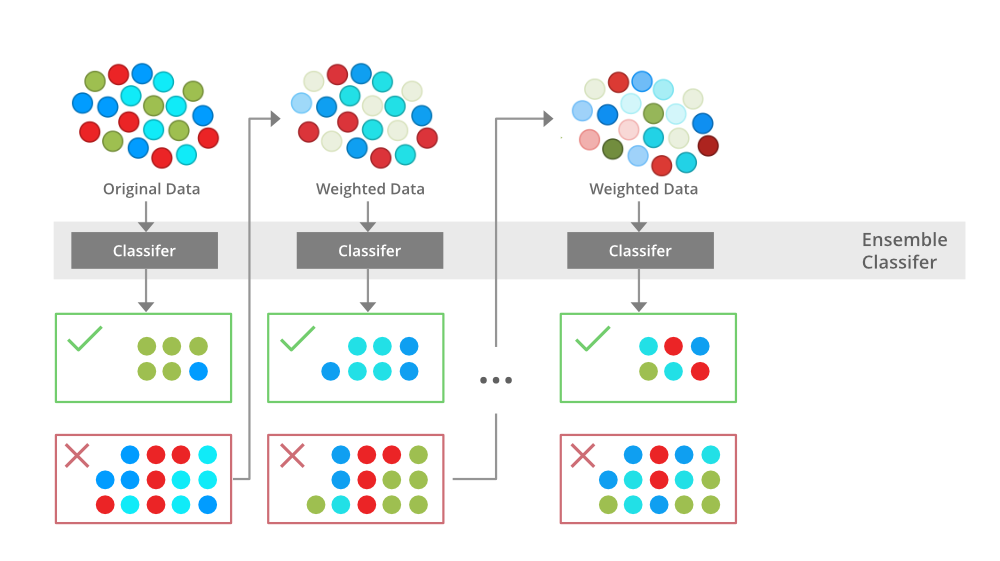

    To understand boosting and its working we will be using Adaboost boosting technique.